---
---

<h1><center><ins>Numerical Methods: Exam 1</ins></center></h1>
<h2><center>November 12, 09:45-11:15 </center></h2>

Please compute the below questions in the python notebook, *documenting your code* where needed. 

Remember also to **_answer any discussion points asked in the question_**.  

***Before 11:20*** your notebook needs to be uploaded to Moodle, and/or emailed to (both) Kristina and Alina <br> (kristina.kislyakova@univie.ac.at, alina.boecker@univie.ac.at)<br>
<br>
This means you have roughly 60 minutes to complete the exercises in this part.

You may use the lecture notes and any of your exercise notebooks freely, but you can **not** use ChatGPT code assistant or other AI coding tools.<br> 
**_Collaboration or plagarized code in any way is prohibited and no phones or communication will be allowed_**.

---
---

In [2]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, lu_solve, lu_factor
from scipy.interpolate import CubicSpline

## Exercise 1 (9 Points)

Consider the system:

$$
\begin{cases}
2x_1 + 2x_2 + 2x_3 = 6 \\
2.001x_1  + 2x_2 + 2x_3 = 6.001 \\
2x_1  + 2.001x_2 + 2x_3 = 6.001
\end{cases}
$$

**(a)** Write the system in matrix form $A\mathbf{x} = \mathbf{b}$. Solve for $\mathbf{x}$ by calculating the inverse of $A$ (Hint: under https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices you should find the build-in function you are looking for). (1 Point)


In [ ]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import solve


A= np.array( [ [ 2, 2, 2 ],
               [ 2.001, 2, 2 ],
               [ 2, 2.001, 2 ] ], dtype=float)
b= np.array( [6, 6.001, 6.001], dtype=float)

# although they are technically linear independent,
# the roundoff errors can make them look the same


**(b)** Perform LU decomposition to find the solution vector $\mathbf{x}$. Calculate the difference between the exact solution $\mathbf{b}$ and your numerical one. Is it the same for the two methods? What does this imply for possibly even larger and thus more complex matrices? (1.5 Points)


In [4]:
lu, piv= lu_factor( A )
U = np.triu(lu)
L = np.tril(lu)
print( f'U={U}' )
print( f'L={L}' )

x1, x2, x3= lu_solve( (lu, piv), b )
print()
print( f'x1={x1:.3f}, x2={x2:.3f}, x3={32:.3f}' )

U=[[2.00100000e+00 2.00000000e+00 2.00000000e+00]
 [0.00000000e+00 1.99950025e-03 9.99500250e-04]
 [0.00000000e+00 0.00000000e+00 4.99875031e-04]]
L=[[2.00100000e+00 0.00000000e+00 0.00000000e+00]
 [9.99500250e-01 1.99950025e-03 0.00000000e+00]
 [9.99500250e-01 4.99875031e-01 4.99875031e-04]]

x1=1.000, x2=1.000, x3=32.000



Now consider the function

$$y = f(x) = \frac{1}{1+x^2}$$

**(c)** Plot the function on a domain of [-10,10] in x. Calculate the numerical derivative of the function using the forward finite difference and plot the result next to it (Hint: use a subplot). Choose the step-size $h$ such that the truncation error is 1e-2 at $x=1$. (Hint: the truncation error is $\epsilon\sim\frac{|f^{\prime\prime}(x)|}{2}h$). (3 Points)


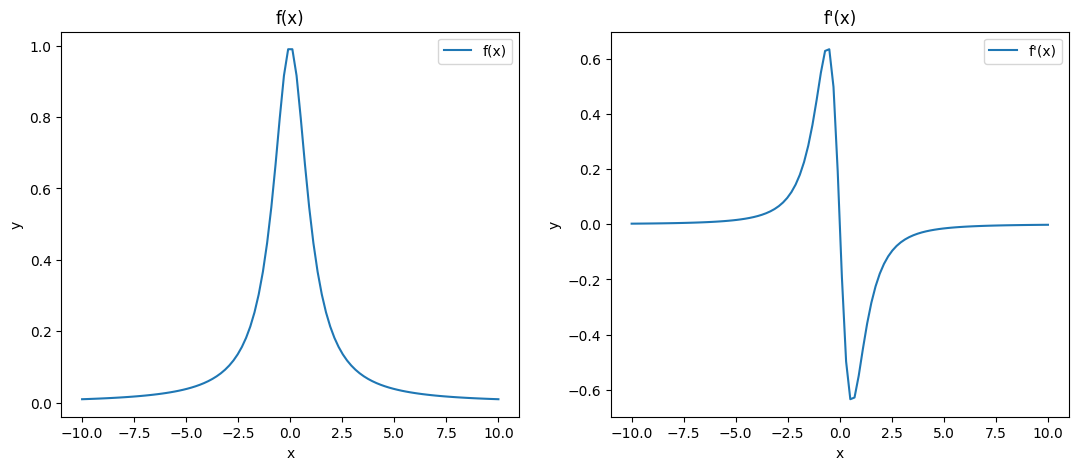

In [6]:
interval= [ -10, 10 ]

def f( x ):
  return 1.0 / ( 1.0 + x*x )


def derivative1( f, interval, num=100 ):
  a= interval[0]                          # interval start
  b= interval[1]                          # interval end
  h= ( b - a ) / num                      # slice width
  fX= []                                  # array for function values
  for i in range( num+1 ):                # from a to b+h
    fX.append( f( a + h * i ) )           # f(x)
  df= []                                  # array for f'
  for i in range( num ):                  # from a to b
    df.append( ( fX[i+1] - fX[i] ) / h )  # f'(x)≈(f(x+h)-f(x))/h
  return df


X= np.linspace( interval[0], interval[1], num=100 )   # 100 x values from a to b
Y= []
for x in X:
  Y.append( f( x ) )                          # y values

fD= derivative1( f, interval, num=100 )

fig, axs= plt.subplots( nrows=1, ncols=2, figsize=(13,5) )

axs[0].set_title( 'f(x)' )
axs[0].set_xlabel( 'x' )
axs[0].set_ylabel( 'y' )
axs[0].plot( X, Y, label='f(x)' )
axs[0].legend()

axs[1].set_title( "f'(x)" )
axs[1].set_xlabel( 'x' )
axs[1].set_ylabel( 'y' )
axs[1].plot( X, fD, label="f'(x)" )
axs[1].legend()

plt.show()


**(d)** Now calculate the second derivative of y numerically. Use the same step-size as before as well as one that is 10 times larger. Using the samples of x with step-size of $10h$, interpolate y using a cubic spline (from scipy.interpolate.CubicSpline: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline). Use the CubicSpline to find the second derivative using step-size $10h$ (Hint: look at the first example under the link). Compare all three numerical derivatives in a figure. What is your conclusion? (3.5 Points)

**(e) Extra Point**  Now add a random error of 1\% to your values of y evaluated with step-size $h$ (Hint: use np.random.normal(y,0.01)). Calculate again the first numerical derivative. Which percentage level is the difference between the new derivative values and the ones from **(c)**? Comment on what is happening. (1 Point)

## Exercise 2 (9 Points)

Consider the following two curves:
$$ f(x) = 6 - (x+2)^2 $$
$$ g(x) = \frac{1}{2}x $$

**(a)** Use _**your own version**_ of the **Newton Raphson method** to find the two intersections of these two curves (Hint: You can reformulate the problem as finding the roots of a single function built from the two given ones.). Plot the two curves in a figure to understand sensible guesses for the two starting points. Also plot the two two intersection points you found with the Newton Raphson method. (Hint: Use xlims=[-10,10] and ylims=[-10,10] for the plot). (2 Points)


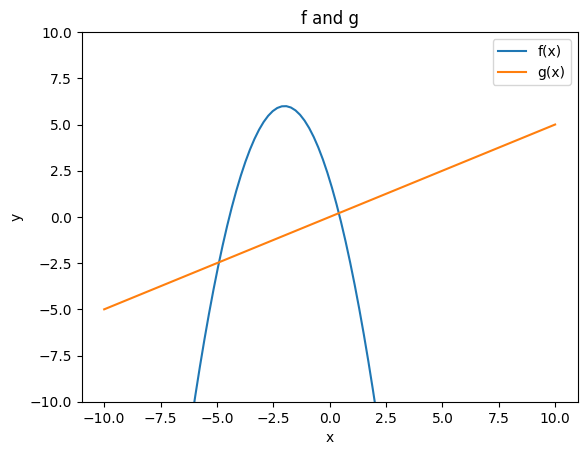

In [32]:
interval= [ -10, 10 ]


def f( x ):
  return 6.0-(x+2.0)**2

def g( x ):
  return x / 2.0

def between( x ):
  return abs( f(x) - (x) )



X= np.linspace( interval[0], interval[1], num=100 )   # 100 x values from a to b
F= []
G= []
for x in X:
  F.append( f( x ) )                          # y values
  G.append( g( x ) )                          # y values

plt.figure()
plt.plot( X, F, label='f(x)' )
plt.plot( X, G, label='g(x)' )
plt.title( 'f and g' )
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.ylim(-10,10)
plt.legend()
plt.show()



**(b)** Use _**your own version**_ of the **Trapezoid method** to find the area between the two curves (Hint: use the points calculated from **(a)** as the upper and lower limits for the integration). Sample the integrand at 100 equally spaced abscissae. Compare this result with the **_build-in version_** of **scipy.integrate.quad**, which uses adaptive Gaussian quadrature. (3 Points)


In [ ]:


def myTrapezoid( y, x ):
  integral= 0
  for i in range( len( x ) - 1 ):
    integral+= ( (x[i+1] - x[i]) * (y[i] + y[i+1]) ) / 2  # Δx · ( leftY + rightY ) / 2
  return integral


interval= [-10, 10]

X= np.linspace( interval[0], interval[1], num=1000 )   # 100 x values from a to b
B= between( X )

myI= myTrapezoid( X, B )
print( 'my area is', myI )

scI= quad( between, interval[0], interval[1] )
print( 'scipi area is', scI[0] )



my area is 1270.1420761122508
scipi area is 689.8568558617961



**(c)** How many samples of abscissae do you need for your Trapezoid method in order to reach the same result provided by scipy.integrate.quad with a precision of 1e-4? Per iteration multiply the number of abscissae by 10. How does this compare to the error returned by the scipy.integrate.quad routine? Comment on this. (3 Points)

**(d)** In your figure from **(a)** shade the area you calculated between the two curves. Hint: Use fill_between from matplotlib. (1 Point)

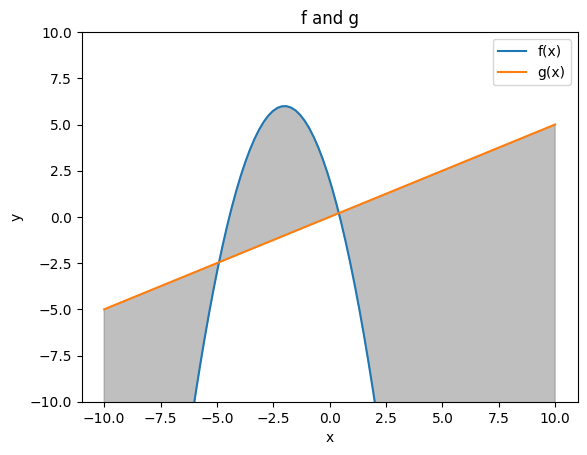

In [33]:
interval= [ -10, 10 ]


def f( x ):
  return 6.0-(x+2.0)**2

def g( x ):
  return x / 2.0

def between( x ):
  return abs( f(x) - (x) )



X= np.linspace( interval[0], interval[1], num=100 )   # 100 x values from a to b
F= []
G= []
for x in X:
  F.append( f( x ) )                          # y values
  G.append( g( x ) )                          # y values

plt.figure()
plt.plot( X, F, label='f(x)' )
plt.plot( X, G, label='g(x)' )
plt.fill_between( X, F, G, color='grey', alpha=0.5 )
plt.title( 'f and g' )
plt.xlabel( 'x' )
plt.ylabel( 'y' )
plt.ylim(-10,10)
plt.legend()
plt.show()